#Summary
## Những Kiến thức đã học (tổng hợp tài liệu):
1. Tổng quan về Numpy
2. Mảng trong Numpy
3. Các hàm tính toán trong Numpy [Link Notebook](https://colab.research.google.com/drive/1sDeFPswe80Hbuo_-6dptgCEwq1XnpegX?ouid=101549289327651690401&usp=drive_link)
4. Các hàm thống kê trong Numpy [Link Notebook](https://colab.research.google.com/drive/1V_mHnFp3Kvr657TRmMikwCyWqxr0C-uj?usp=drive_link)

--------------------------------------------------------------------------------

# Bonus: Hiểu thêm về kiểu dữ liệu
*Trong khoa học dữ liệu, hiểu cách mà dữ liệu được lưu trữ hay cách thao tác với dữ liệu là rất quan trọng, vì vậy trong bài viết ngắn này sẽ cung cấp cho mọi người góc nhìn trực quan hơn về cách mà python tổ chức dữ liệu, cũng như cách mà Numpy lưu trữ, tổ chức dữ liệu.*

## Cách lưu trữ dữ liệu của Python khác gì ngôn ngữ khác  
Trong C/C++, khi chúng ta muốn khai báo biến, thứ quan trọng nhất chính là kiểu dữ liệu, nó giúp chúng ta lưu trữ dữ liệu tối ưu nhất. Thế nhưng python rất khác, nhiều người ưa thích tính tiện lợi của nó khi việc lưu trữ kiểu dữ liệu dưới dạng động (dynamic - tự động phù hợp với input gán cho biến)  
Ví dụ:  
```C
/* C code */
int x = 4;
x = "four";  // FAILS
```
```python
# Python code
x = 4
x = "four"
```
Hay  
```python
x = 8
x = x/3
type(x) # float
```

## Số nguyên (Integer) trong Python không đơn giản chỉ là số nguyên  
Nếu mọi người để ý, cùng một kiểu dữ liệu nhưng chúng ta sẽ khá khó khăn nếu lưu trữ 10 hoặc 1000000000000. Đơn giản vì vấn đề memory, vì vậy thường trong C/C++ ta thường khai báo int hoặc long/ long long tùy vào độ lớn cảu input. Tuy nhiên trong python ta chẳng mấy quan tâm đến vấn đều này, bởi lẽ chúng ta có gán cho biến integer trong python 100 hay 10000000 thì nó vẫn hoạt động tốt, vậy phía hậy trường python đã lưu trữ như thế nào?  
Phiên bản python 3.4 ghi nhận khi tạo ra 1 biến integer(object), Python đã tạo ra đúng 1 structure C như sau:  
```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```
 Có thể thấy 1 biến integer trong Python 3.4 có 4 phần:  
 * ob_refcnt: phần tham chiếu, giúp python âm thầm sử lí việc phân bổ, giải phóng bộ nhớ.
 * ob_type: thông tin kiểu dữ liệu.
 * ob_size: thông tin kích thước dữ liệu.
 * ob_digit: nơi chứa giá trị của biến integer đã lưu.  
 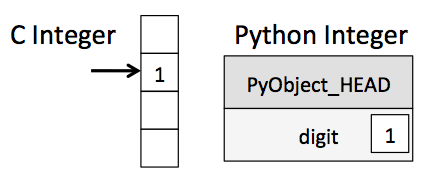


## List trong Python cũng không đơn giản chỉ là list  
```python
L3 = [True, "2", 3.0, 4]
```
Có thể chúng ta thấy danh sách này rất bình thường, nhưng nó không bình thường chút nào, khi mà nó chưa được cả 4 kiểu dữ liệu lẫn lộn trong một object, có thể gọi đây là đặc tính "dynamic typing" của Python. Tuy nhiên tiện lợi là vậy, cái giá phải trả đương nhiên có. Mỗi item trong list phải tự giữ lấy thông tin:  
* Kiểu dữ liệu (type)
* Thông tin tham chiếu (reference count)
* Một số thông tin khác  
Như vậy, vấn đề trùng lặp sẽ xảy ra nếu tất cả item trong list đều cùng một kiểu dữ liệu.  
  
**Hình dưới đây trực quan sự khác nhau giữa fixed-type(numpy array) và dynamic type(Py list)**  
Ưu điểm của python list chính là sự linh hoạt, trong khi numpy array rất hiệu quả trong việc lưu và thao tác dữ liệu
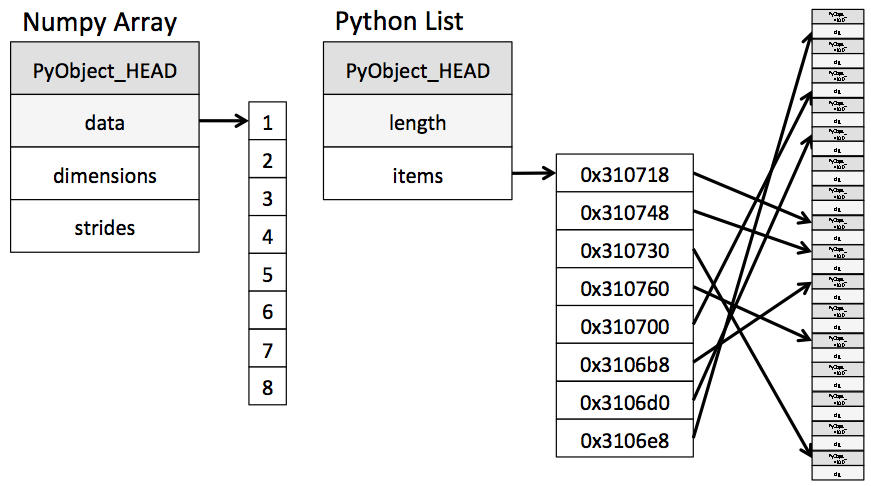

In [1]:
import numpy as np
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

Mảng numpy chứa các giá trị của một kiểu dữ liệu duy nhất, vì vậy chúng ta cần có kiến thức chi tiết, ưu điểm - hạn chế của các kiểu dữ liệu đó, vì cơ bản numpy được xây dựng lên từ C

## Bảng tính chất kiểu dữ liệu  
| Data type | Mô tả                                                        |
|-----------|--------------------------------------------------------------|
| bool_     | Boolean (Đúng hoặc Sai) được lưu dưới dạng 1 byte         |
| int_      | Loại số nguyên mặc định (giống như long trong C; thường là int64 hoặc int32) |
| intc      | Tương tự như int trong C (thường là int32 hoặc int64)       |
| intp      | Số nguyên được sử dụng cho việc chỉ mục (giống như ssize_t trong C; thường là int32 hoặc int64) |
| int8      | Byte (-128 đến 127)                                          |
| int16     | Số nguyên (-32768 đến 32767)                                |
| int32     | Số nguyên (-2147483648 đến 2147483647)                      |
| int64     | Số nguyên (-9223372036854775808 đến 9223372036854775807)    |
| uint8     | Số nguyên không dấu (0 đến 255)                             |
| uint16    | Số nguyên không dấu (0 đến 65535)                           |
| uint32    | Số nguyên không dấu (0 đến 4294967295)                      |
| uint64    | Số nguyên không dấu (0 đến 18446744073709551615)            |
| float_    | Viết tắt cho float64.                                             |
| float16   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa |
| float32   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa |
| float64   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa |
| complex_  | Viết tắt cho complex128.                                          |
| complex64 | Số phức, được biểu diễn bằng hai số thực 32-bit            |
| complex128| Số phức, được biểu diễn bằng hai số thực 64-bit            |


*Nguồn thao khảo: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)*